# ARIMA Model - Stock Price Prediction

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Read in stock historical prices and calculate daily return
stock_prices = pd.read_csv("../Resources/stock_historical_prices.csv") 
stock_prices = stock_prices.set_index("Date")
stock_prices["Return"] = stock_prices["Adj Close"].pct_change() * 100
stock_prices.dropna(inplace=True)
stock_prices.head()

,Adj Close,Return
Date,,
2015-08-10,143.419998,-0.090564
2015-08-11,142.800003,-0.432293
2015-08-12,141.600006,-0.840334
2015-08-13,141.949997,0.247169
2015-08-14,142.570007,0.436781


Text(0, 0.5, 'Close Price')

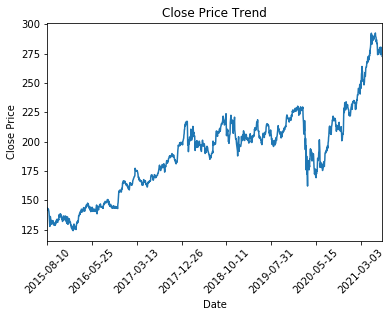

In [6]:
# Plot just the "Adj Close" column from the dataframe:
stock_prices["Adj Close"].plot(title="Close Price Trend", rot=45)
plt.ylabel("Close Price")

Text(0, 0.5, 'Close Price')

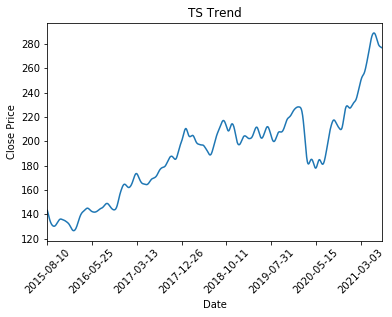

In [7]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Adj Close" price into two separate series:

ts_noise, ts_trend = sm.tsa.filters.hpfilter(stock_prices['Adj Close'])
ts_trend.plot(title= "TS Trend", rot=45)
plt.ylabel("Close Price")

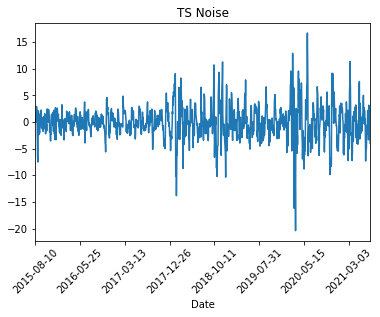

In [8]:
ts_noise.plot(title = "TS Noise", rot=45)

In [9]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:

close_prices = pd.DataFrame(stock_prices["Adj Close"])
close_prices["Trend"] = ts_trend
close_prices["Noise"] = ts_noise

close_prices.head()

,Adj Close,Trend,Noise
Date,,,
2015-08-10,143.419998,143.106255,0.313743
2015-08-11,142.800003,142.359076,0.440927
2015-08-12,141.600006,141.612093,-0.012086
2015-08-13,141.949997,140.865777,1.084220
2015-08-14,142.570007,140.120594,2.449413


Text(0, 0.5, 'Settle, Trend ($)')

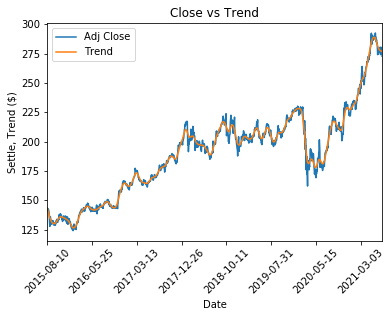

In [10]:
# Plot the Settle Price vs. the Trend for 2015 to the present

close_prices[["Adj Close","Trend"]].loc["2015":].plot(title = "Close vs Trend", rot=45)

plt.ylabel("Settle, Trend ($)")

Text(0, 0.5, 'Close, Noise ($)')

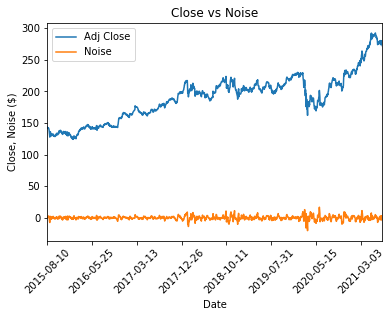

In [11]:
# Plot the Settle Noise

close_prices[["Adj Close","Noise"]].loc["2015":].plot(title = "Close vs Noise", rot=45)

plt.ylabel("Close, Noise ($)")

In [14]:
from statsmodels.tsa.arima_model import ARIMA
# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))

model = ARIMA(close_prices["Adj Close"], order=(5, 1, 2))

# Fit the model

results = model.fit()

/Users/draganbogatic/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/draganbogatic/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [15]:
# Output model summary results:

print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1495
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -3477.642
Method:                       css-mle   S.D. of innovations              2.477
Date:                Sun, 25 Jul 2021   AIC                           6973.283
Time:                        22:43:08   BIC                           7021.072
Sample:                             1   HQIC                          6991.089
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0868      0.062      1.401      0.161      -0.035       0.208
ar.L1.D.Adj Close    -1.5618      0.093    -16.872      0.000      -1.743      -1.380
ar.L2.D.Adj Close    -0.

In [16]:
# p values of the lags are above our treshold of 0.05, thus our ARIMA model is not a good fit to make predictions for this dataset. We can tweak hyperparameters ARIMA(df, order=(p, d, q)) and see if that will improve the model perfomance.

In [17]:
price_forecast = pd.DataFrame(results.forecast(steps=5)[0])
price_forecast

,0
0,274.147963
1,273.096930
2,273.838019
3,273.462878
4,273.539828


Text(0.5, 0, 'Day')

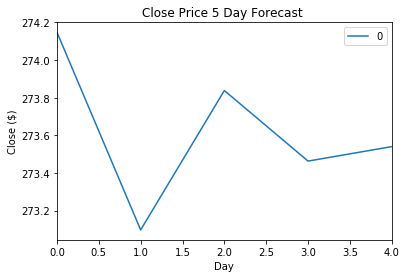

In [18]:
# Plot the 5 Day Price Forecast
price_forecast = pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Close Price 5 Day Forecast ")
plt.ylabel("Close ($)")
plt.xlabel("Day")